### PREGUNTA 4

El archivo Web Server Requests G contiene un conjunto de datos que proporciona un registro histórico (sintético) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta información es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura, y garantizar un rendimiento óptimo
en un entorno de servidor web real.
1. Identificar patrones de tráfico web como horas pico de actividad y momentos de menor demanda.
2. Ajuste una distribución gamma a sus datos de “Arrival Rate”, trace el histograma de sus datos junto con la función de densidad de probabilidad (pdf) de la distribución gamma ajustada y muestre los parámetros de la distribución gamma ajustada.
3. ¿Cuál es la probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo?
4. ¿Cuál es la probabilidad de que la tasa de llegada supere un umbral crítico de, por ejemplo, 15 solicitudes por minuto, en el próximo intervalo?
5. Si la capacidad máxima de procesamiento del servidor es de 25 solicitudes por intervalo, ¿Cuál la probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo?

Parámetros de la distribución gamma ajustada: shape=1.2863239035572631, loc=-0.00010219942177852536, scale=3.055955972870093


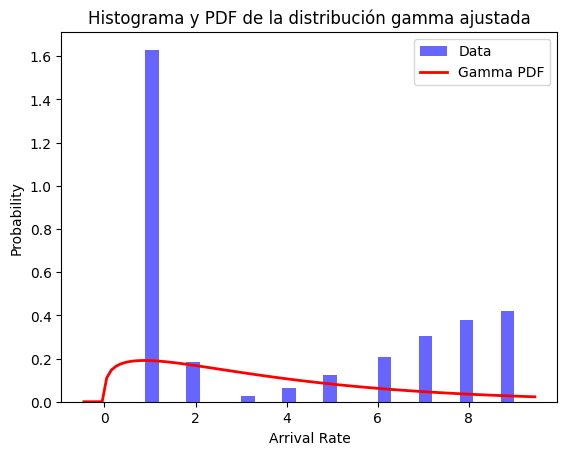

Probabilidad de recibir más de 8 solicitudes: 0.11643528333708753
Probabilidad de que la tasa de llegada supere 15 solicitudes/minuto: 0.013613993294689042
Probabilidad de superar la capacidad máxima de procesamiento del servidor: 0.0005865153311331861


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np


def ajustar_distribucion_gamma(datos):
    """
    Ajusta una distribución gamma a los datos.

    Parámetros:
        datos (pandas.Series): La serie de datos para ajustar la distribución gamma.

    Retorna:
        tuple: Los parámetros de la distribución gamma ajustada (shape, loc, scale).
    """
    return gamma.fit(datos)

def plotear_histograma_y_pdf(datos, shape, loc, scale):
    """
    Plotea el histograma de los datos junto con la PDF de la distribución gamma ajustada.

    Parámetros:
        datos (pandas.Series): La serie de datos para plotear.
        shape (float): Parámetro de forma de la distribución gamma.
        loc (float): Parámetro de locación de la distribución gamma.
        scale (float): Parámetro de escala de la distribución gamma.
    """
    plt.hist(datos, bins=30, density=True, alpha=0.6, color='b', label='Data')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = gamma.pdf(x, shape, loc, scale)
    plt.plot(x, p, linewidth=2, label='Gamma PDF',color='red')
    plt.legend()
    plt.xlabel('Arrival Rate')
    plt.ylabel('Probability')
    plt.title('Histograma y PDF de la distribución gamma ajustada')
    plt.show()

def calcular_probabilidad_mas_solicitudes(dato_umbral, shape, loc, scale):
    """
    Calcula la probabilidad de recibir más de un cierto número de solicitudes.

    Parámetros:
        dato_umbral (float): El umbral de solicitudes.
        shape (float): Parámetro de forma de la distribución gamma.
        loc (float): Parámetro de locación de la distribución gamma.
        scale (float): Parámetro de escala de la distribución gamma.

    Retorna:
        float: La probabilidad de recibir más de `dato_umbral` solicitudes.
    """
    return 1 - gamma.cdf(dato_umbral, shape, loc, scale)

# Cargar los datos
url = 'https://raw.githubusercontent.com/DCajiao/Distribuciones-de-Probabilidad/main/data/Web_Server_Requests_G.csv'
df = pd.read_csv('../data/Web_Server_Requests_G.csv')

# Ajuste de la distribución gamma
shape, loc, scale = ajustar_distribucion_gamma(df['Arrival_Rate'])
print(f"Parámetros de la distribución gamma ajustada: shape={shape}, loc={loc}, scale={scale}")

# Plotear el histograma junto con la PDF de la distribución gamma ajustada
plotear_histograma_y_pdf(df['Arrival_Rate'], shape, loc, scale)

# Probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo
prob_c = calcular_probabilidad_mas_solicitudes(8, shape, loc, scale)
print(f"Probabilidad de recibir más de 8 solicitudes: {prob_c}")

# Probabilidad de que la tasa de llegada supere un umbral crítico de 15 solicitudes por minuto en el próximo intervalo
prob_d = calcular_probabilidad_mas_solicitudes(15, shape, loc, scale)
print(f"Probabilidad de que la tasa de llegada supere 15 solicitudes/minuto: {prob_d}")

# Probabilidad de superar la capacidad máxima de procesamiento del servidor (25 solicitudes por intervalo) en el siguiente intervalo
prob_e = calcular_probabilidad_mas_solicitudes(25, shape, loc, scale)
print(f"Probabilidad de superar la capacidad máxima de procesamiento del servidor: {prob_e}")
